In [1]:
# import all kinds of libraries for image processing
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# import the dl libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

import sklearn as sk

2023-05-24 16:51:29.941839: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Create the dataset; the folder emoji contains 3 folders: angry,happy,sad
# each of the folders contains images; we will use these images to train our model

# import the libraries for reading the images
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split


In [4]:
# take faces/fer2013/fer2013.csv as the dataset
# the dataset contains 35887 images
# each image is 48x48 pixels
# each pixel has a value between 0 and 255
# the first column contains the emotion label
# the second column contains the pixels of the image
# the third column contains the usage of the image

# read the csv file
import pandas as pd
df = pd.read_csv('faces/fer2013/fer2013.csv')

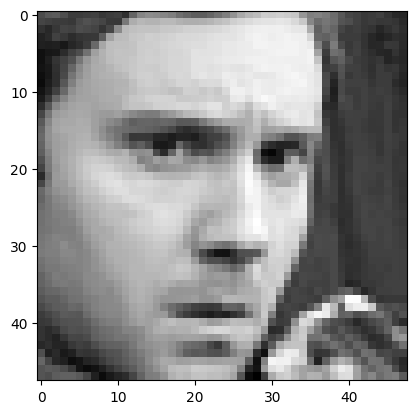

In [5]:
# show 1 image from the dataset
# the image is 48x48 pixels
# the image is in grayscale

img = df['pixels'][0]
img = img.split(' ')
img = np.array(img, 'float32')
img = img.reshape(48, 48)
plt.imshow(img, cmap='gray')

### (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

In [6]:
# Take the labels put them in numpy array
# Take the pixels put them in numpy array

# take the labels
y = df['emotion'].values

# take the pixels
X = df['pixels'].values

# convert the pixels to images
X = np.array([np.fromstring(image, np.uint8, sep=' ') for image in X])
X = X.reshape(X.shape[0], 48, 48, 1)


In [7]:
# split the dataset into training and testing
# 80% of the dataset is for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

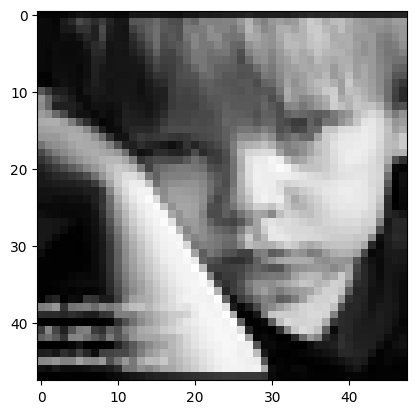

In [8]:
# take a random image from the training set
# show the image

img = X_train[0]
img = img.reshape(48, 48)
plt.imshow(img, cmap='gray')

In [9]:
# create model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# 2nd layer
model.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
# 3rd layer
model.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))
model.add(BatchNormalization())
# 4th layer
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))
model.add(BatchNormalization())
# flatten
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='sigmoid'))

# compile model
model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

2023-05-24 16:52:32.172205: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: UNKNOWN ERROR (34)
2023-05-24 16:52:32.172345: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Laptop): /proc/driver/nvidia/version does not exist
2023-05-24 16:52:32.177923: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# check if gpu available
print(tf.test.is_gpu_available())
tf.config.list_physical_devices('GPU')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


[]

In [11]:
# train model
model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
202/202 [==============================] - 391s 2s/step - loss: 1.6488 - accuracy: 0.3504 - val_loss: 1.6788 - val_accuracy: 0.3424
Epoch 2/50
202/202 [==============================] - 365s 2s/step - loss: 1.3237 - accuracy: 0.4906 - val_loss: 1.6004 - val_accuracy: 0.4424
Epoch 3/50
202/202 [==============================] - 353s 2s/step - loss: 1.1628 - accuracy: 0.5556 - val_loss: 1.1904 - val_accuracy: 0.5566
Epoch 4/50
202/202 [==============================] - 347s 2s/step - loss: 1.0527 - accuracy: 0.6002 - val_loss: 1.1628 - val_accuracy: 0.5566
Epoch 5/50
202/202 [==============================] - 347s 2s/step - loss: 0.9543 - accuracy: 0.6407 - val_loss: 1.1950 - val_accuracy: 0.5514
Epoch 6/50
 55/202 [=======>......................] - ETA: 4:11 - loss: 0.8058 - accuracy: 0.7000


KeyboardInterrupt



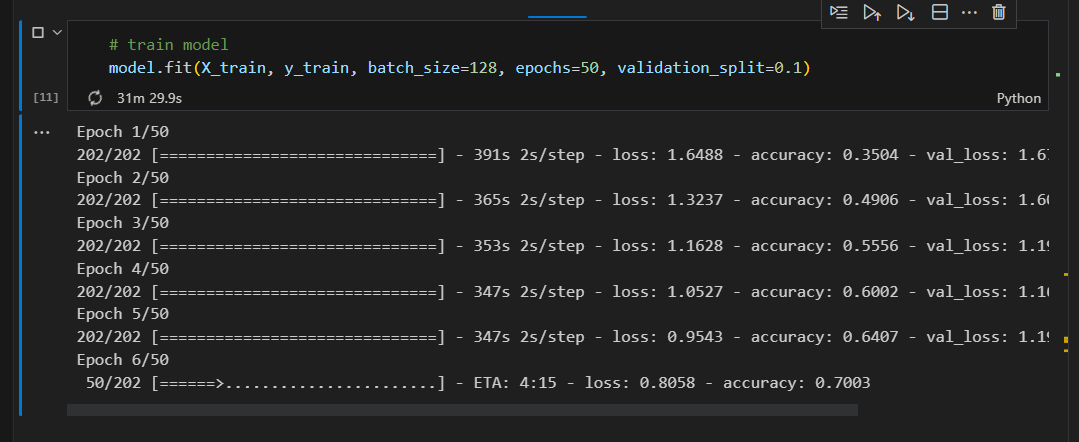

In [12]:
# predict 1 image
img = X_test[0]
img = img.reshape(1, 48, 48, 1)
y_predict = model.predict(img)
print(y_predict)

1/1 [==============================] - 0s 156ms/step
[[0.35833186 0.00731644 0.43868333 0.8505725  0.3370598  0.3944891
  0.63748074]]


[[False False False  True False False  True]]


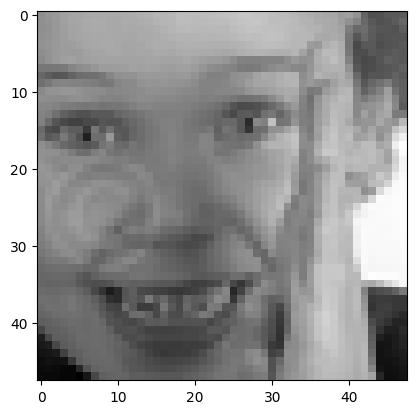

In [14]:
# threshold y_predict with 0.5
# y_predict = (y_predict > 0.5)
# print the corresponding emotion labels
print(y_predict)
# In this case it's 3 and 5, so happy and neutral
plt.imshow(img.reshape(48, 48), cmap='gray')

In [ ]:
# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
target_emotions = ['happiness', 'disgust', 'surprise']
model = fm.FERModel(target_emotions)

Initializing FER model parameters for target emotions: ['happiness', 'disgust', 'surprise']


ModuleNotFoundError: No module named 'EmoPy'

In [ ]:
# model predict on the test set
y_pred = model.predict(X_test)

# show the confusion matrix
from sklearn.metrics import confusion_matrix


225/225 [==============================] - 18s 80ms/step


In [ ]:
# y_pred = np.argmax(y_pred)
# y_test = np.argmax(y_test)
# print(y_pred)
# print(y_test)
cm = confusion_matrix(y_test, y_pred)
# show matrix
print(cm)

[[   5    0    0  898    0   82    0]
 [   0    0    0   98    0    4    0]
 [   2    0    0  981    0   60    0]
 [   3    0    0 1681    0   81    0]
 [   0    0    0 1173    0   37    0]
 [   3    0    0  647    0  145    0]
 [   0    0    0 1263    0   15    0]]


In [ ]:
# load inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

In [ ]:
from tensorflow.keras.models import load_model

model_path = "conv_model_0123456.h5"
model = load_model(model_path)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
# predict test dataset
y_pred = model.predict(X_test)
print(y_pred)

225/225 [==============================] - 42s 184ms/step
[[4.37996630e-03 5.32887316e-06 6.81314170e-02 ... 1.54597894e-03
  4.66016978e-01 4.85636247e-03]
 [1.45811209e-04 7.43478445e-10 1.17373129e-03 ... 1.52035582e-05
  4.80871312e-02 1.39343110e-03]
 [2.72934437e-02 2.01771600e-05 6.69150651e-02 ... 1.38925493e-01
  3.19591910e-03 7.45957613e-01]
 ...
 [1.32947877e-01 5.02098538e-03 2.45195195e-01 ... 2.67442968e-02
  1.67710125e-01 1.86442044e-02]
 [3.01089048e-01 1.09824855e-02 1.67185098e-01 ... 2.38619700e-01
  2.27445867e-02 2.16422230e-01]
 [1.24160154e-02 8.08136247e-05 9.59036052e-01 ... 1.36477938e-02
  1.38172582e-02 8.84382462e-04]]


In [ ]:
# transform y_pred to labels
y_labels = np.argmax(y_pred, axis=1)
print(y_labels)
# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
# turn numbers into labels
# create y_l which iterates through y_labels and turns the numbers into labels
y_l = []
for i in y_labels:
    if i == 0:
        y_l.append('angry')
    elif i == 1:
        y_l.append('disgust')
    elif i == 2:
        y_l.append('fear')
    elif i == 3:
        y_l.append('happy')
    elif i == 4:
        y_l.append('sad')
    elif i == 5:
        y_l.append('surprise')
    elif i == 6:
        y_l.append('neutral')


[5 3 6 ... 3 0 2]


In [ ]:
y_tl = []
for i in y_test:
    if i == 0:
        y_tl.append('angry')
    elif i == 1:
        y_tl.append('disgust')
    elif i == 2:
        y_tl.append('fear')
    elif i == 3:
        y_tl.append('happy')
    elif i == 4:
        y_tl.append('sad')
    elif i == 5:
        y_tl.append('surprise')
    elif i == 6:
        y_tl.append('neutral')

[[ 528    0   90   55  245   55   12]
 [  64    4   11    2   16    4    1]
 [ 201    0  414   74  175  105   74]
 [ 196    0   78 1257  174   33   27]
 [ 108    1  112  160  796   79   22]
 [ 203    1  211  116  353  313   13]
 [  66    0  153  100   47    4  425]]


<AxesSubplot:>

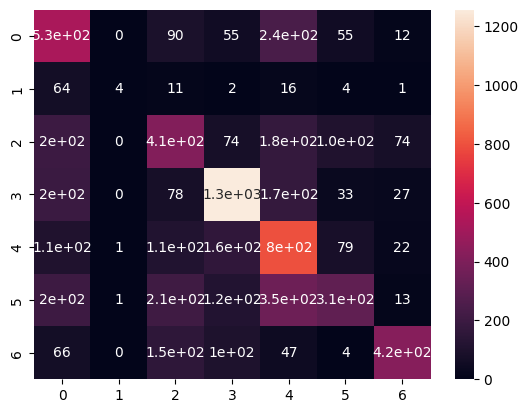

In [ ]:
# confusion matrix
cm = confusion_matrix(y_tl, y_l)
print(cm)
# use seaborn
import seaborn as sns
# craete confusion matrix in seaborn
sns.heatmap(cm, annot=True)